In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('all_text_data.csv')

In [3]:
df.head()

,Unnamed: 0,index,name,title,url,banner_url,subscribers,active_accounts,score,text,word_c
0,0,0,AskReddit,Ask Reddit...,/r/AskReddit/,https://b.thumbs.redditmedia.com/PXt8GnqdYu-9l...,25192935,134018,464436,"AskReddit has hit 25,000,000 subscribers! (ins...",11988
1,1,1,news,"All news, US and international.",/r/news/,https://b.thumbs.redditmedia.com/WFgeymV_hst-g...,19267086,36157,718544,Epstein jail guards had been offered plea deal...,3046
2,2,2,funny,funny,/r/funny/,https://a.thumbs.redditmedia.com/9zfV0uAe-z008...,27133349,36266,836722,Subreddit Of The Month [November 2019]: /r/sud...,4456
3,3,3,AmItheAsshole,Am I the Asshole?,/r/AmItheAsshole/,NaN,1498468,27283,266584,AmItheButtface: Where do all the other posts g...,8865
4,4,4,gaming,r/gaming,/r/gaming/,NaN,24119770,27405,1145960,Free Talk Friday!A note about suspected advert...,5837


In [4]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [6]:
def num_lets(text):
    return(len(text))

In [7]:
df['number_letters'] = df.text.apply(num_lets)
df.head()

,Unnamed: 0,index,name,title,url,banner_url,subscribers,active_accounts,score,text,word_c,number_letters
0,0,0,AskReddit,Ask Reddit...,/r/AskReddit/,https://b.thumbs.redditmedia.com/PXt8GnqdYu-9l...,25192935,134018,464436,"AskReddit has hit 25,000,000 subscribers! (ins...",11988,70274
1,1,1,news,"All news, US and international.",/r/news/,https://b.thumbs.redditmedia.com/WFgeymV_hst-g...,19267086,36157,718544,Epstein jail guards had been offered plea deal...,3046,21118
2,2,2,funny,funny,/r/funny/,https://a.thumbs.redditmedia.com/9zfV0uAe-z008...,27133349,36266,836722,Subreddit Of The Month [November 2019]: /r/sud...,4456,28082
3,3,3,AmItheAsshole,Am I the Asshole?,/r/AmItheAsshole/,NaN,1498468,27283,266584,AmItheButtface: Where do all the other posts g...,8865,50914
4,4,4,gaming,r/gaming,/r/gaming/,NaN,24119770,27405,1145960,Free Talk Friday!A note about suspected advert...,5837,35651


In [8]:
import seaborn as sns

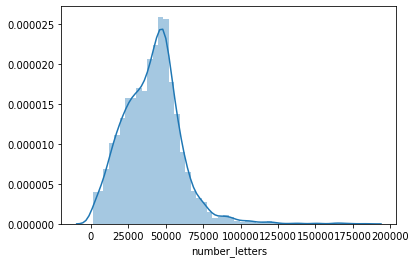

In [9]:
sns.distplot(df.number_letters)

In [10]:
def shrink(text):
    if len(text) > 75000:
        text = text[0:75000]
    else:
        text = text
    return(text)

In [11]:
df['shortened_text'] = df.text.apply(shrink)
df.head()

,Unnamed: 0,index,name,title,url,banner_url,subscribers,active_accounts,score,text,word_c,number_letters,shortened_text
0,0,0,AskReddit,Ask Reddit...,/r/AskReddit/,https://b.thumbs.redditmedia.com/PXt8GnqdYu-9l...,25192935,134018,464436,"AskReddit has hit 25,000,000 subscribers! (ins...",11988,70274,"AskReddit has hit 25,000,000 subscribers! (ins..."
1,1,1,news,"All news, US and international.",/r/news/,https://b.thumbs.redditmedia.com/WFgeymV_hst-g...,19267086,36157,718544,Epstein jail guards had been offered plea deal...,3046,21118,Epstein jail guards had been offered plea deal...
2,2,2,funny,funny,/r/funny/,https://a.thumbs.redditmedia.com/9zfV0uAe-z008...,27133349,36266,836722,Subreddit Of The Month [November 2019]: /r/sud...,4456,28082,Subreddit Of The Month [November 2019]: /r/sud...
3,3,3,AmItheAsshole,Am I the Asshole?,/r/AmItheAsshole/,NaN,1498468,27283,266584,AmItheButtface: Where do all the other posts g...,8865,50914,AmItheButtface: Where do all the other posts g...
4,4,4,gaming,r/gaming,/r/gaming/,NaN,24119770,27405,1145960,Free Talk Friday!A note about suspected advert...,5837,35651,Free Talk Friday!A note about suspected advert...


In [17]:

for i in range(len(df.shortened_text.values)):
    if i % 100 == 0:
        print(i)
    docs = []
    for tok in nlp(df.text.values[i]):
        if tok.is_stop != True and tok.is_punct != True:
            docs.append(tok.lemma_.strip())
    documents.append(docs)
            

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [18]:
len(documents)

4917

In [19]:
len(df)

4917

In [20]:
df['tokens'] = documents
df.head()

,Unnamed: 0,index,name,title,url,banner_url,subscribers,active_accounts,score,text,word_c,number_letters,shortened_text,tokens
0,0,0,AskReddit,Ask Reddit...,/r/AskReddit/,https://b.thumbs.redditmedia.com/PXt8GnqdYu-9l...,25192935,134018,464436,"AskReddit has hit 25,000,000 subscribers! (ins...",11988,70274,"AskReddit has hit 25,000,000 subscribers! (ins...","[AskReddit, hit, 25,000,000, subscriber, inser..."
1,1,1,news,"All news, US and international.",/r/news/,https://b.thumbs.redditmedia.com/WFgeymV_hst-g...,19267086,36157,718544,Epstein jail guards had been offered plea deal...,3046,21118,Epstein jail guards had been offered plea deal...,"[Epstein, jail, guard, offer, plea, dealtrump,..."
2,2,2,funny,funny,/r/funny/,https://a.thumbs.redditmedia.com/9zfV0uAe-z008...,27133349,36266,836722,Subreddit Of The Month [November 2019]: /r/sud...,4456,28082,Subreddit Of The Month [November 2019]: /r/sud...,"[Subreddit, Month, November, 2019, /r, suddenl..."
3,3,3,AmItheAsshole,Am I the Asshole?,/r/AmItheAsshole/,NaN,1498468,27283,266584,AmItheButtface: Where do all the other posts g...,8865,50914,AmItheButtface: Where do all the other posts g...,"[amithebuttface, post, go?AITA, out, ex, gay, ..."
4,4,4,gaming,r/gaming,/r/gaming/,NaN,24119770,27405,1145960,Free Talk Friday!A note about suspected advert...,5837,35651,Free Talk Friday!A note about suspected advert...,"[Free, Talk, Friday!A, note, suspect, advertis..."


In [25]:
df.to_csv('token_data.csv')

In [22]:
li = []
for i in df.tokens.values:
    li.append(len(i))

In [24]:
max(li)

21268

In [34]:
import pymongo

In [33]:
pip install pymongo[srv]

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
